# Seelk Data Challenge
by Thomas Dufour

## Introduction & context:

This Notebook is my work on the Seelk's Data Challenge.
The objective is to create a Machine Learning model that predicts which seller in concurrence to sell a product on Amazon will get the Buy-box and explain what are the most important insights in order to get the buy-box. 
This Buy-box is important because it assure the one who has it to sell much more. 

## Starting Point: The Data

First of all, let's give a look to the data I received.

It is a 600 000 lines long CSV file (values are separated with semi-colons). Each line is a product with its owned caracteristics.

In [1]:
#Created on Thu Oct 11 18:39:03 2018, @author: dufour Thomas

import numpy as np
import pandas as pd

df = pd.read_csv('seelk_data_extract.csv', sep=';')
df.head()

,offer,scraping_date,buy_box_owner,owner_merchant_id,price_currency,delivery_details,condition,seller_name,rating_text,products_details,fba_text,add_to_basket,url,offer_ranking,merchant_id,shipping_cost,is_global_store,is_prime
0,7247,2018-05-31,Verkauf und Versand durch Die NaturApotheke. F...,A2YQFBJ9TJXWZ0,"EUR 19,17","+ EUR 3,95 Versandkosten",Neu,Die NaturApotheke,5 von 5 Sternen 98% positiv in den letzten 12 ...,['Lieferung erfolgt 6.-8. Juni. Weitere Inform...,None,In den Einkaufswagen von Verkäufer Die NaturAp...,https://www.amazon.de/gp/offer-listing/B000M45...,1,A2YQFBJ9TJXWZ0,"EUR 3,95",False,False
1,375109,2018-05-31,Verkauf und Versand durch Amazon. Geschenkverp...,1,"EUR 17,50","+ EUR 17,90 Versandkosten",Neu,PICCOLO,5 von 5 Sternen 100% positiv in den letzten 12...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,None,In den Einkaufswagen von Verkäufer PICCOLO und...,https://www.amazon.de/gp/offer-listing/B00AUV7...,9,A1OJ6JQSEK83CV,"EUR 17,90",False,False
2,375109,2018-05-31,Verkauf und Versand durch Amazon. Geschenkverp...,1,"EUR 20,09","+ EUR 13,06 Versandkosten",Neu,Brikoland,3 von 5 Sternen 57% positiv in den letzten 12 ...,['Lieferung erfolgt 13.-18. Juni. Weitere Info...,None,In den Einkaufswagen von Verkäufer Brikoland u...,https://www.amazon.de/gp/offer-listing/B00AUV7...,8,A14OYWBRW8YQ5Q,"EUR 13,06",False,False
3,375109,2018-05-31,Verkauf und Versand durch Amazon. Geschenkverp...,1,"EUR 22,90","+ EUR 10,00 Versandkosten",Neu,Qualazampapetshop,"4,5 von 5 Sternen 86% positiv. (7 alle Bewertu...",['Lieferung erfolgt 15.-20. Juni. Weitere Info...,None,In den Einkaufswagen von Verkäufer Qualazampap...,https://www.amazon.de/gp/offer-listing/B00AUV7...,7,A1H4RFP0B0FMHY,"EUR 10,00",False,False
4,375109,2018-05-31,Verkauf und Versand durch Amazon. Geschenkverp...,1,"EUR 20,34","+ EUR 11,90 Versandkosten",Neu,Initpc,4 von 5 Sternen 79% positiv. (39 alle Bewertun...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,None,In den Einkaufswagen von Verkäufer Initpc und ...,https://www.amazon.de/gp/offer-listing/B00AUV7...,6,A1VCQKXS62I5R,"EUR 11,90",False,False


### First toughts about the data

Every column isn't necessary, some have redundant information. Delivery_details has the same relevant information than shipping_cost but in a much more complicated manier. 

Also rating text isn't exploitable in this form, it must be transformed before we can use it. The currency value like 'EUR' won't be accepted by the machine learning model, the number has to be extracted. By extracting the currency device we do not loose any relevant information because the devise is the same inside a same offer group. 

### Who's the winner?

Creating a machine learning model that actually predict which seller 'll win the buy box requires to know how to identify the winner. The dataset contains the information and the instruction text say *'The offer wins the Buy Box if the seller_name is in the buy_box_owner field'*. So, I have to check if the seller name is the same than the buy_box_owner. 
But there is a problem: the buy_box_owner field isn't exactly the same than any value of the group' seller_name field. The winner's name is contained inside a string. 
we can know if a seller's name is contained with:

In [ ]:
if df['seller_name'][row] not in df['buy_box_owner'][row]:
    print('True')

Clearly, this method isn't optimised and will be a conflict source later.
Fortunatly, there is a other way to check if a seller is the winner: checking for the ID. As every seller has an unique ID value, if a seller's ID is the owner_merchant_id, then this seller owns the buy-box.


In [ ]:
if df.owner_merchant_id[row] == df.serller_id[row]:
    #that's the winner!

While testing hypothesis about how to determine the winner, I found the Amazon's ID is 1. 
Because Amazon seemed to win a lot of buy-box, I wanted to found the ratio of Amazon getting the buy-box.

In [3]:
i=0
j=0
for row in range(df.shape[0]):
    if df['merchant_id'][row] == '1':
        j +=1
        if df['owner_merchant_id'][row] == '1':
            i +=1
if j==0:
    j=1
print(i/j)

0.9149968207829957


Fun fact: Amazon wins 91,5% of times it sells a product it-self.

And thanks to 'owner_merchant_id' and 'merchant_id', I don't have to use 'buy_box_owner' and 'seller_name'. We can drop it.
In fact, there are a lot a columns we can drop:


    fba_text: because there is no use here.

    products_details: same.

    add_to_basket: it's only the name of the button, it doesn't create any distinction between sellers.

    condiction: all products are new except 7 offers over 2 products. So I just consider to get them like they were new.

    url: it is quite random but it alway ends with 'new' even if the product is not.

### How to identify groups?

An other thing trigered my attention: Some offers number appears manytime, but only one time a day maximun.
I identify every single group by using a key madeo out of the offer and date. I first though to use a hash function but the calculation was a bit long and the result wasn't very useable, so I concatenate the offer value with the date.

In [4]:
#creating unique offer identifyer
tmp = np.zeros((df.shape[0],1))
Hoffer = pd.DataFrame(tmp, columns = ['Hoffer'])
for i in range(len(Hoffer.Hoffer)):
    Hoffer.Hoffer[i] = str(str(df['offer'][i]) + str(df['scraping_date'][i]))
df.offer = Hoffer.Hoffer
df = df.drop(labels = 'scraping_date', axis = 1)
del Hoffer

### Cleaning Data
Before I can use any machine learning on this data, I need to clean it as possible. I must get rid of null values and I must transform the data into usable format.


#### Extracting Rating Mark
Because I think the rating for a product is significantly important, I want to keep it inside my dataframe and extracting the number of stars. 
When we look to values of rating_text, it has standart string structure.

In [5]:
df.rating_text[1]

'5 von 5 Sternen 100% positiv in den letzten 12 Monaten. (1 Bewertungen insgesamt)'

Here, many choice can be made. We can choose to keep the percentage value, or the number of stars, or considering some value with the number of votes. I personally choose to count the number of stars because we can clusterise offers on this criteria.

In [ ]:
#trying to replace rating_text by the rating %
for i in range(len(df.rating_text)):
    tmp = []
    for s in str.split(str(df.rating_text[i])):
        if s.isdigit():
            tmp.append(int(s))
    if not tmp:
        df.iloc[i,3] = -1
    else:
        df.iloc[i,3] = tmp[0]

#### Normalizing prices and filling null values
The future model will only work if the data is in a exploitable format. This include extracting the digital value away from text and filling null values. 
Here, we have 'EUR 19,17' then '£ 38.50' (and many more..). We have to deal with the text but also the point or colon separator. 

Some rare price values are marked as 'None'. The instruction text warmed for the real-world non-perfect data... well, it is.
I decided to assign them -1, as this value cannot be achieve otherwise. I choose to do this despite it can interfere in the future model performance because I have in mind to use the DecisionTreeClassifier (or decision tree). Those kind of model can separate samples on hard and arbitory values and managing this choice.

I do the same for shipping_cost. If I don't detect anyprice, I assume there is not delivery fees.

In [ ]:
#norming the price format, we don't care about the currency because it doesn't change over one product
for i in range(len(df.price_currency[:])):
    tmp = ''.join([s for s in list(str(df.price_currency[i])) if s.isdigit()])
    if tmp:
        df.iloc[i,2] = int(tmp)/100
    else:
        df.iloc[i,2] = -1
        
for i in range(len(df.price_currency)):
    if df.price_currency[i] == 'None' :
        df.iloc[i, 2] = -1
df.price_currency = df.price_currency.astype(float)

#norming the price format, we don't care about the currency because it doesn't change over one product
for i in range(len(df.shipping_cost[:])):
    tmp = ''.join([s for s in list(str(df.shipping_cost[i])) if s.isdigit()])
    if tmp:
        df.iloc[i,6] = int(tmp)/100
    else: 
        df.iloc[i,6] = 0

df.rating_text = df.rating_text.astype(float)

the line :
```python
''.join([s for s in list(str(df.price_currency[i])) if s.isdigit()])
```
seems like a bit complexed but it only concatenate string's characters that are digital. 
I could have used Regex but for better performance, i choose to do it in this quite pythonic way.

Despite my efforts, this treatment takes a long time to be executed. I will use the saved results I get before writing this report, but it should be equivalent.

In [6]:
df = pd.read_csv("DataSave1.csv")
df= df.drop(labels= 'Unnamed: 0', axis=1)

C:\Users\dufou\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Guest who the winner, without knowing the group
Machine learning models are create a such way they take only 1 line as input, here that means we can only give 1 offer a time.

How can we know if the offer is going to have the buy-box ? this information depends on the whole offer group.
It is like wanting to know if a sprinter is going to win the race without knowing how fast are other concurrents.

A solution is a to give relevant informations on the group to every line. An offer will have a ranking of its rating_text value, same for price, the number of sellers inside the group, and so on...

To continue the metaphore, it is  like each sprinter runs with a notebook containing the performance time of other runners inside his group.

In [ ]:
from threading import Thread

#grouping the same offers together in order to get some stats on it
df = df.assign(sprice = np.zeros((df.shape[0],1)) )
df = df.assign(srating = np.zeros((df.shape[0],1)) )
df = df.assign(nb_sellers = np.zeros((df.shape[0],1)) )


grouped =list(df.groupby('offer'))
tmp = grouped[1][1] #to access to the grouped's dataframe


class Isolateur(Thread):
    #"""Thread pour répartir les infos des paquets dans chaque ligne de df"""
    def __init__(self, grouped):

        Thread.__init__(self)

        self.grouped = grouped

    def run(self):

        for group in grouped:
            tmp = group[1]
            nb_sellers = len(tmp)
            sort = tmp.sort_values(by= 'price_currency')
            score = 1
            for index in sort.index:
                df.iloc[index, 9] = score
                score += 1
            sort = tmp.sort_values(by= 'rating_text', ascending=False)
            score = 1
            for index in sort.index:
                df.iloc[index, 10] = score
                score +=1
                df.iloc[index, 11] = nb_sellers
            
                

thread_1 = Isolateur(grouped[:20000]) #chaque paquet s'occupe de 20 000 groupes
thread_2 = Isolateur(grouped[20001:40000])
thread_3 = Isolateur(grouped[40001:60000])
thread_4 = Isolateur(grouped[60001:])

thread_1.start()
thread_2.start()
thread_3.start()
thread_4.start()

thread_1.join()
thread_2.join()
thread_3.join()
thread_4.join()

df.to_csv('Gino.csv', sep=',')
#it required so much efforts I had to give it a proper name


In [7]:
df = pd.read_csv("Gino.csv")

This algorithm works wells and every iteration is quick, it is in O(n*t) time complexity, n the total number of offers and t the average seller number inside a group.

Despite its performances, because we give it 600 000 offers, it takes a long time.... it lasts for hours. In order to get stuff done quicker, I parallerized the process in 4 different and independant threads. Because I have 4 cores inside my laptop, I threaded it in 4, reducing the time by 4. Using a server cpu with dozen of cores would reduce drastically the time consumption.

## The Machine Learning Model
Just as the instruction text said: "Your goal is to build a model which is able to predict which offer wins the Buy Box, and explain what are the most important parameters."

I need to be able to predict if an offer will be in the buy-box or not and to explain what is my model doing.
Many options were possible (Neural Networks, SVM,SGD classifiers, etc...) but I choose to use Decision Tree Classifiers because they are easily explainable and can be visualized.

Machine learning models doesn't have to only train to beb performant, they have to tested on samples they didn't train on before. This is crucial because it prevent the model to overfit and be too specialized to the training set. Every set has its own irregularities, if the model overfits, what it learned doesn't generalizes to the testing set.

So, to test my model, I splitted the samples in 2 set, the training set and testing set.

In [12]:
from sklearn import tree
from matplotlib import pyplot
import graphviz 

#Creating the result array
Y = np.zeros((df.shape[0],1))
for i in range(len(df)):
    if df.owner_merchant_id[i] == df.merchant_id[i]:
        Y[i] = 1
X = df[:][:]
X = X.drop(labels = 'Unnamed: 0', axis=1)
X = X.drop(labels = 'owner_merchant_id', axis=1)
X = X.drop(labels = 'merchant_id', axis=1) #because we cannot give to it the answer to easily
X = X.drop(labels = 'offer', axis=1) #because it doesn't matter now


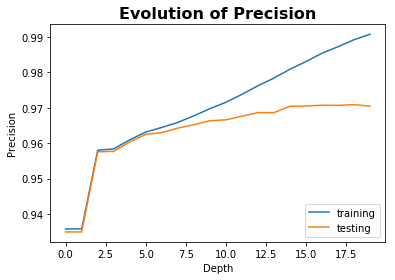

In [13]:
#Let's try to find to G spot
Xtrain = X[:450000]
Xtest = X[450001:]
Ytrain = Y[:450000]
Ytest = Y[450001:]

max_deepth = 20
trainE = np.zeros((max_deepth))
testE = np.zeros((max_deepth))
for i in range (max_deepth):
    clf = tree.DecisionTreeClassifier(max_depth= i+1)
    clf.fit(Xtrain,Ytrain)
    predict = clf.predict(Xtest)
    trainE[i] = clf.score(Xtrain,Ytrain)
    testE[i] = clf.score(Xtest,Ytest)
    

pyplot.plot(trainE[:], label="training")
pyplot.plot(testE[:], label="testing")
# Add legend
pyplot.legend(loc='lower right')
# Add title and x, y labels
pyplot.title("Evolution of Precision", fontsize=16, fontweight='bold')
pyplot.xlabel("Depth")
pyplot.ylabel("Precision")
pyplot.savefig("precision-depth.png")
pyplot.show()
#14 seems to be a good max_depth

Many parameters are important in Decision Tree Classifier like the Kernel function (here, it is Gini) and formost the tree's depth. 

I tested many depth with an automatic loop. 
The optimased parameter is the argmax of the test_precision. Here, I think 14 is the max depth before the model starts to overfit too much.

This Decision tree has a overall precision of 98%, which means that 98% of its predictions are correct. It learned to guest which seller inside a group in going to have the buy-box :-D


A usecase for this model would be the help sellers to get the buy-box by telling them what to do.

This tree doesn't have the merchant_id, it doesn't know who is Amazon, but it is quite sure it learned to recognize Amazon. 

### The explaination
To understand what is doing the model and what are the most important features, I created a smaller tree and created a visual representation.

In [18]:
clf = tree.DecisionTreeClassifier(max_depth= 3)
clf = clf.fit(X, Y)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names='01',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Amazon3") 
print(clf.score(X,Y))

0.957921226342683


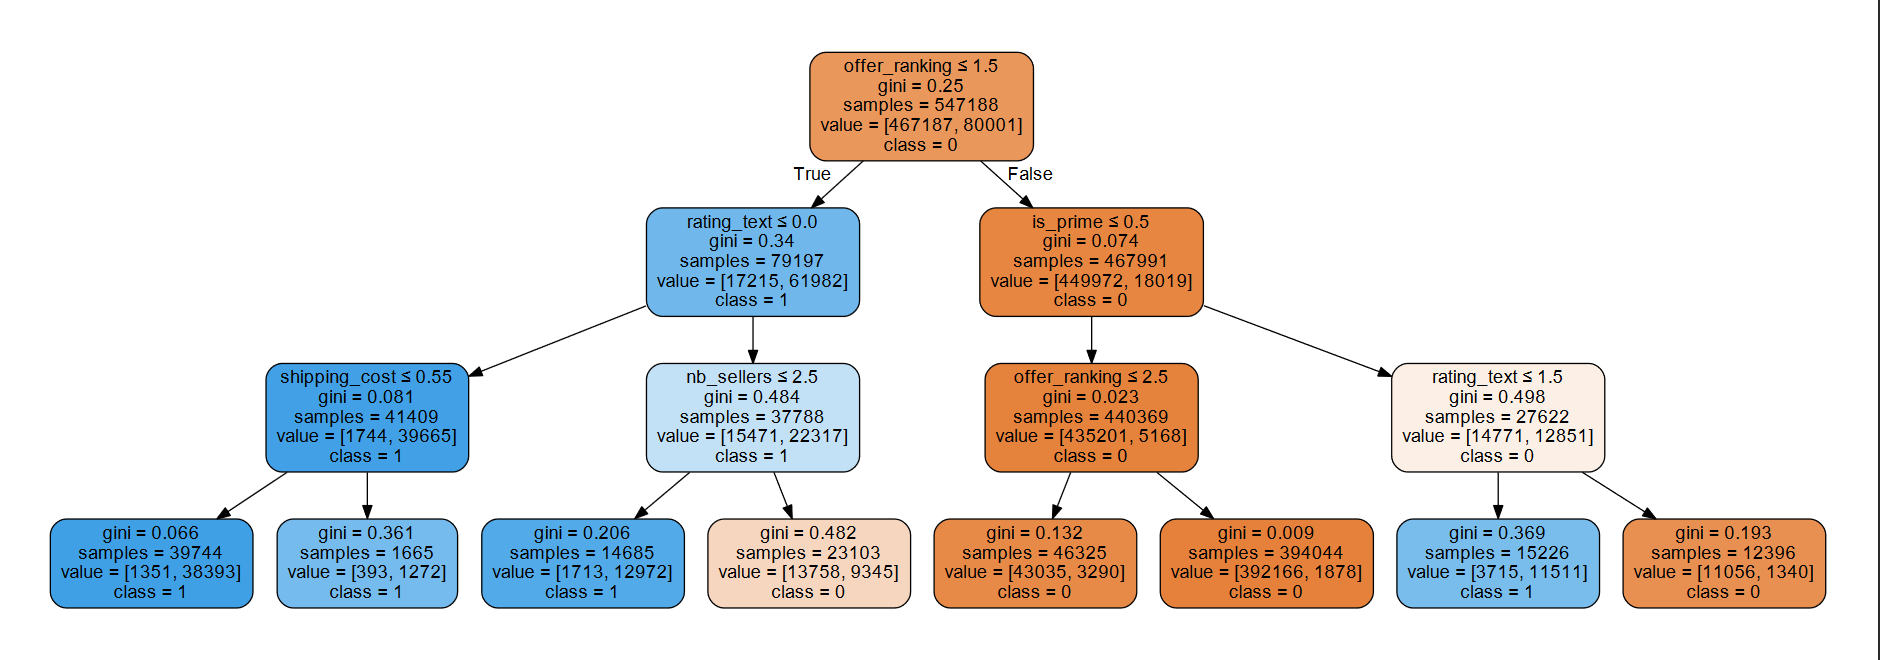

The tree starts form the top and split samples depending on the criteria the tree found out to be the most important. The most important criteriaes are on the top of the tree. The choosen criteria is written for each node.

Definitely, having the best rating_text is very important.

The blue box are the one where the positive evaluated samples are grouped, in orange, the ones negatively categorized.
Here, blue means the offer has the buy-box and orange the offers that haven't.

### Going Further: The Random Forest
When we use decision tree classifier, we can try to create a meta classifier of Decision Tree classifiers. This Classifier is composed of many random trees that have different parameters. Eventually, each tree inside has its own biais but the ensemble should be extremely resilient to over-interpretation and overfitting. 

In [23]:
#let's try to use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

Y = np.zeros((df.shape[0],1))
for i in range(len(df)):
    if df.owner_merchant_id[i] == df.merchant_id[i]:
        Y[i] = 1
X = df[:][:]
X = X.drop(labels = 'Unnamed: 0', axis=1)
X = X.drop(labels = 'owner_merchant_id', axis=1)
X = X.drop(labels = 'merchant_id', axis=1) #because we cannot give to it the answer to easily
X = X.drop(labels = 'offer', axis=1) #because it doesn't matter now
Xtrain = X[:450000]
Xtest = X[450001:]
Ytrain = Y[:450000]
Ytest = Y[450001:]

RFclf = RandomForestClassifier(n_estimators=X.shape[1],
                              random_state=0)
            #the depth is automatic

RFclf.fit(Xtrain, Ytrain)
RFscore = RFclf.score( Xtest ,Ytest)


print(RFclf.feature_importances_)
print("training score:", RFclf.score(X,Y))
print("testing score:", RFscore)


C:\Users\dufou\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.24500166e-01 1.19347835e-01 2.67497672e-01 5.21140288e-02
 4.50055705e-07 1.96025063e-01 1.17880365e-01 3.62042262e-02
 8.64301938e-02]
training score: 0.9918017207979707
testing score: 0.9735252657248398
